## About Dataset

CONTENT :

Human Development Index (HDI):
A composite index measuring average achievement in three basic dimensions of human
development—a long and healthy life, knowledge and a decent standard of living.

Life expectancy at birth:
Number of years a newborn infant could expect to live if prevailing patterns of age-specific
mortality rates at the time of birth stay the same throughout the infant’s life.

Expected years of schooling:
Number of years of schooling that a child of school entrance age can expect to receive if prevailing
patterns of age-specific enrolment rates persist throughout the child’s life.

Gross national income (GNI)
per capita: Aggregate income of an economy generated by its production and its ownership of factors of production, less the incomes paid for the use of factors of production owned by the rest of the world,
converted to international dollars using PPP rates, divided by midyear population.

GNI per capita rank minus HDI rank:
Difference in ranking by GNI per capita and by HDI value. A negative value means that the country is
better ranked by GNI than by HDI value.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('datasets/Human Development Index and Components.csv', encoding='latin-1')

sample = data.sample(10)
sample

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Unnamed: 10,Unnamed: 11
69,70,Barbados,HIGH,0.790,77.6,15.7,9.9,"12,306",26,71,NaN,NaN
15,16,Liechtenstein,VERY HIGH,0.935,83.3,15.2,12.5,"146,830",-15,14,NaN,NaN
27,28,France,VERY HIGH,0.903,82.5,15.8,11.6,"45,937",-2,28,NaN,NaN
100,101,Uzbekistan,HIGH,0.727,70.9,12.5,11.9,"7,917",18,107,NaN,NaN
163,163,Nigeria,LOW,0.535,52.7,10.1,7.2,"4,790",-22,163,NaN,NaN
136,137,Honduras,MEDIUM,0.621,70.1,10.1,7.1,"5,298",-1,138,NaN,NaN
120,121,Iraq,MEDIUM,0.686,70.4,12.1,7.9,"9,977",-12,122,NaN,NaN
105,106,"Palestine, State of",HIGH,0.715,73.5,13.4,9.9,"6,583",21,109,NaN,NaN
194,195,Somalia,OTHER,..,55.3,..,..,"1,018",..,..,NaN,NaN
80,80,Moldova (Republic of),HIGH,0.767,68.8,14.4,11.8,"14,875",-1,81,NaN,NaN


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           195 non-null    object 
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
 8   GNI per capita rank minus HDI rank      195 non-null    object 
 9   HDI rank.1                              195 non-null    object 
 10  Unnamed: 10                             0 non-null      float6

In [28]:
data = data.drop(['Unnamed: 10','Unnamed: 11'], axis=1)
data.isna().sum()

HDI rank                                  0
Country                                   0
HUMAN DEVELOPMENT                         0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank.1                                0
dtype: int64

In [4]:
data['Country'].unique()

array(['Switzerland', 'Norway', 'Iceland', 'Hong Kong, China (SAR)',
       'Australia', 'Denmark', 'Sweden', 'Ireland', 'Germany',
       'Netherlands', 'Finland', 'Singapore', 'Belgium', 'New Zealand',
       'Canada', 'Liechtenstein', 'Luxembourg', 'United Kingdom', 'Japan',
       'Korea (Republic of)', 'United States', 'Israel', 'Malta',
       'Slovenia', 'Austria', 'United Arab Emirates', 'Spain', 'France',
       'Cyprus', 'Italy', 'Estonia', 'Czechia', 'Greece', 'Poland',
       'Bahrain', 'Lithuania', 'Saudi Arabia', 'Portugal', 'Latvia',
       'Andorra', 'Croatia', 'Chile', 'Qatar', 'San Marino', 'Slovakia',
       'Hungary', 'Argentina', 'Türkiye', 'Montenegro', 'Kuwait',
       'Brunei Darussalam', 'Russian Federation', 'Romania', 'Oman',
       'Bahamas', 'Kazakhstan', 'Trinidad and Tobago', 'Costa Rica',
       'Uruguay', 'Belarus', 'Panama', 'Malaysia', 'Georgia', 'Mauritius',
       'Serbia', 'Thailand', 'Albania', 'Bulgaria', 'Grenada', 'Barbados',
       'Antigua an

In [29]:
import pycountry_convert as pc
import pycountry

# Load all countries with their continents
country_to_continent = {}
country_continent = {}

for country in pycountry.countries:
    try:
        country_alpha2 = country.alpha_2
        country_alpha3 = country.alpha_3
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        country_to_continent[country_alpha3] = continent_name
    except (KeyError, AttributeError):
        pass

# Print the dictionary
for country_alpha3, continent in country_to_continent.items():
    country_name = pycountry.countries.get(alpha_3=country_alpha3).name
    country_continent[country_name] = continent




In [30]:
data['Region'] = data['Country'].map(country_continent)

In [32]:
data.dropna(subset=['Region'], inplace=True)

In [33]:
data.isna().sum()

HDI rank                                  0
Country                                   0
HUMAN DEVELOPMENT                         0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank.1                                0
Region                                    0
dtype: int64

In [41]:
data.describe()

,HDI rank,Life expectancy at birth
count,182.000000,182.000000
mean,97.032967,71.334615
std,56.350119,7.724458
min,1.000000,52.500000
25%,49.250000,65.700000
50%,96.500000,71.800000
75%,146.000000,76.975000
max,195.000000,85.900000


In [42]:
data.columns

Index(['HDI rank', 'Country', 'HUMAN DEVELOPMENT',
       'Human Development Index (HDI) ', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank.1', 'Region'],
      dtype='object')

In [49]:
data = data.drop(data[data['Mean years of schooling'] == '..'].index)

In [52]:
# Remove commas from the values in the 'Gross national income (GNI) per capita' column
data['Gross national income (GNI) per capita'] = data['Gross national income (GNI) per capita'].str.replace(',', '')

In [56]:
cols = { 'Expected years of schooling':float, 'Mean years of schooling':float,
       'Gross national income (GNI) per capita':float,
       'GNI per capita rank minus HDI rank':int}

data = data.replace(',', '')

data = data.astype(cols)

In [57]:
data.columns

Index(['HDI rank', 'Country', 'HUMAN DEVELOPMENT',
       'Human Development Index (HDI) ', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank.1', 'Region'],
      dtype='object')

In [58]:
# Convert the column to float type
data['Human Development Index (HDI) '] = data['Human Development Index (HDI) '].astype(float)


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                179 non-null    int64  
 1   Country                                 179 non-null    object 
 2   HUMAN DEVELOPMENT                       179 non-null    object 
 3   Human Development Index (HDI)           179 non-null    float64
 4   Life expectancy at birth                179 non-null    float64
 5   Expected years of schooling             179 non-null    float64
 6   Mean years of schooling                 179 non-null    float64
 7   Gross national income (GNI) per capita  179 non-null    float64
 8   GNI per capita rank minus HDI rank      179 non-null    int32  
 9   HDI rank.1                              179 non-null    object 
 10  Region                                  179 non-null    object 
dty

In [63]:
data.describe()

,HDI rank,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,95.407821,0.721402,71.386034,13.512291,8.978212,20497.553073,-0.189944
std,55.386955,0.151254,7.595909,2.940317,3.213634,22002.312952,14.163083
min,1.000000,0.385000,52.500000,5.500000,2.100000,732.000000,-47.000000
25%,48.000000,0.599000,65.750000,11.600000,6.200000,4622.000000,-8.000000
50%,95.000000,0.740000,71.800000,13.400000,9.300000,12349.000000,2.000000
75%,144.000000,0.837000,76.950000,15.600000,11.500000,30079.500000,9.000000
max,191.000000,0.962000,84.800000,21.100000,14.100000,146830.000000,37.000000


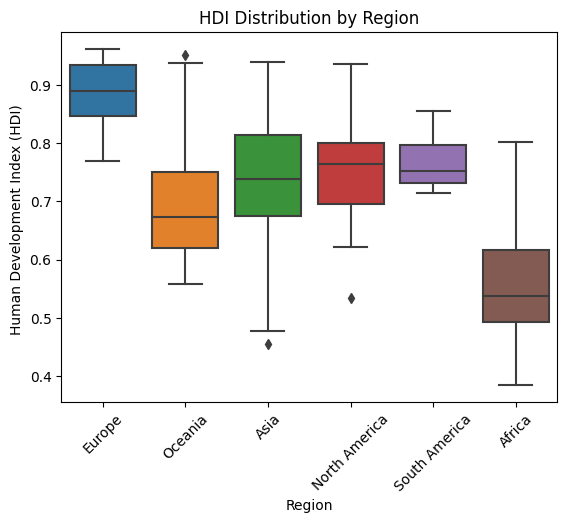

In [62]:
sns.boxplot(data=data, x='Region',y='Human Development Index (HDI) ')
plt.xticks(rotation=45)
plt.title('HDI Distribution by Region')
plt.show()

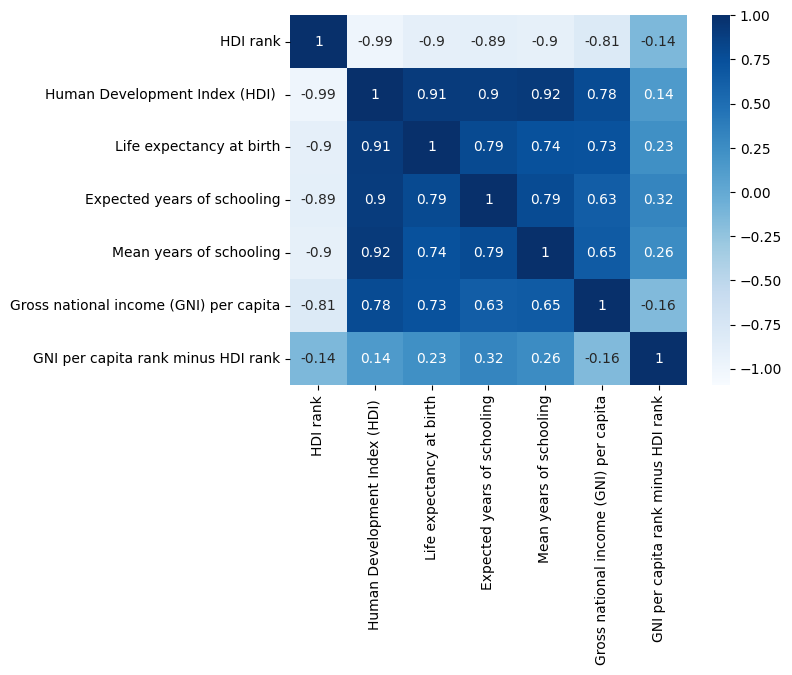

In [78]:
heatmap = data.corr(numeric_only=True)
sns.heatmap(heatmap, annot=True,vmin=heatmap.values.max(), vmax=heatmap.values.min(), cmap='Blues')
plt.show()

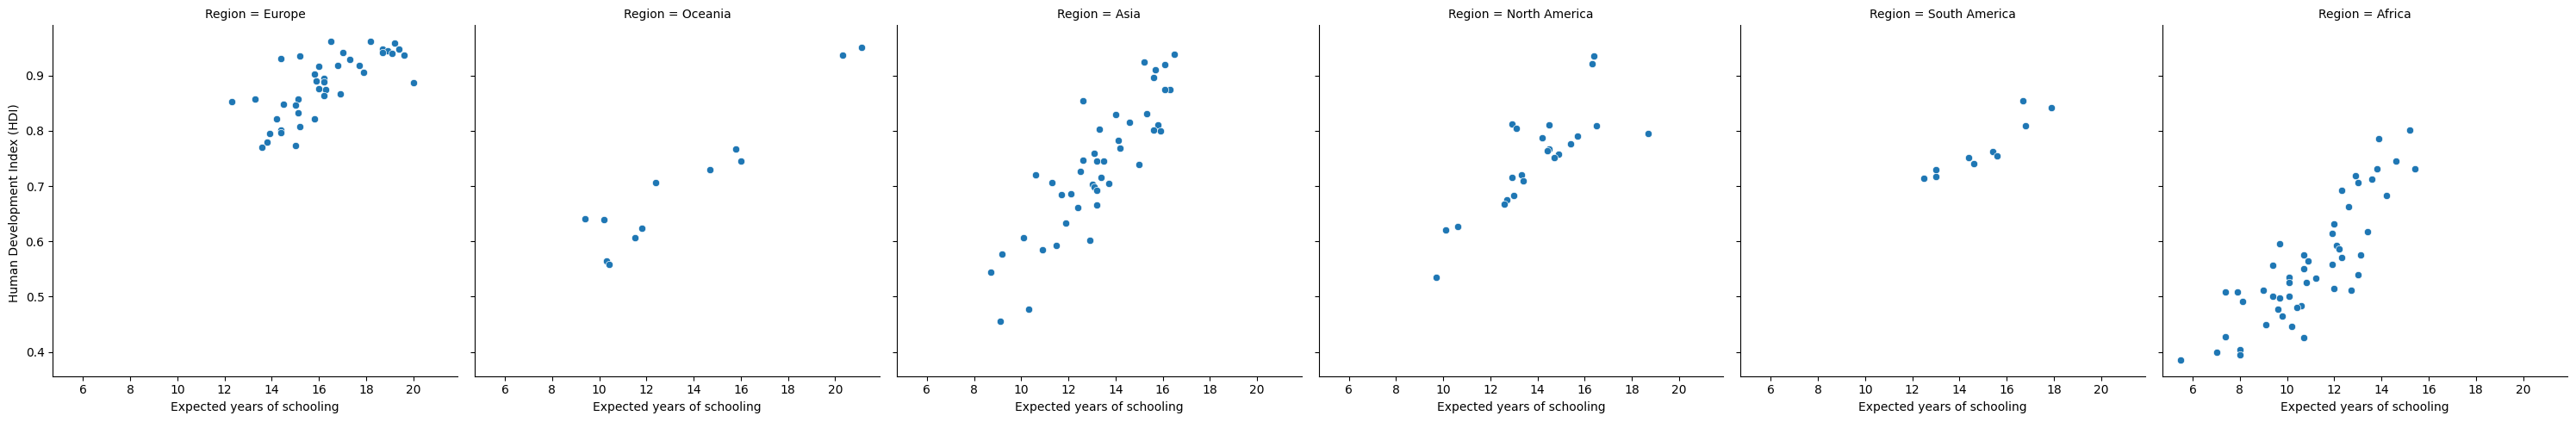

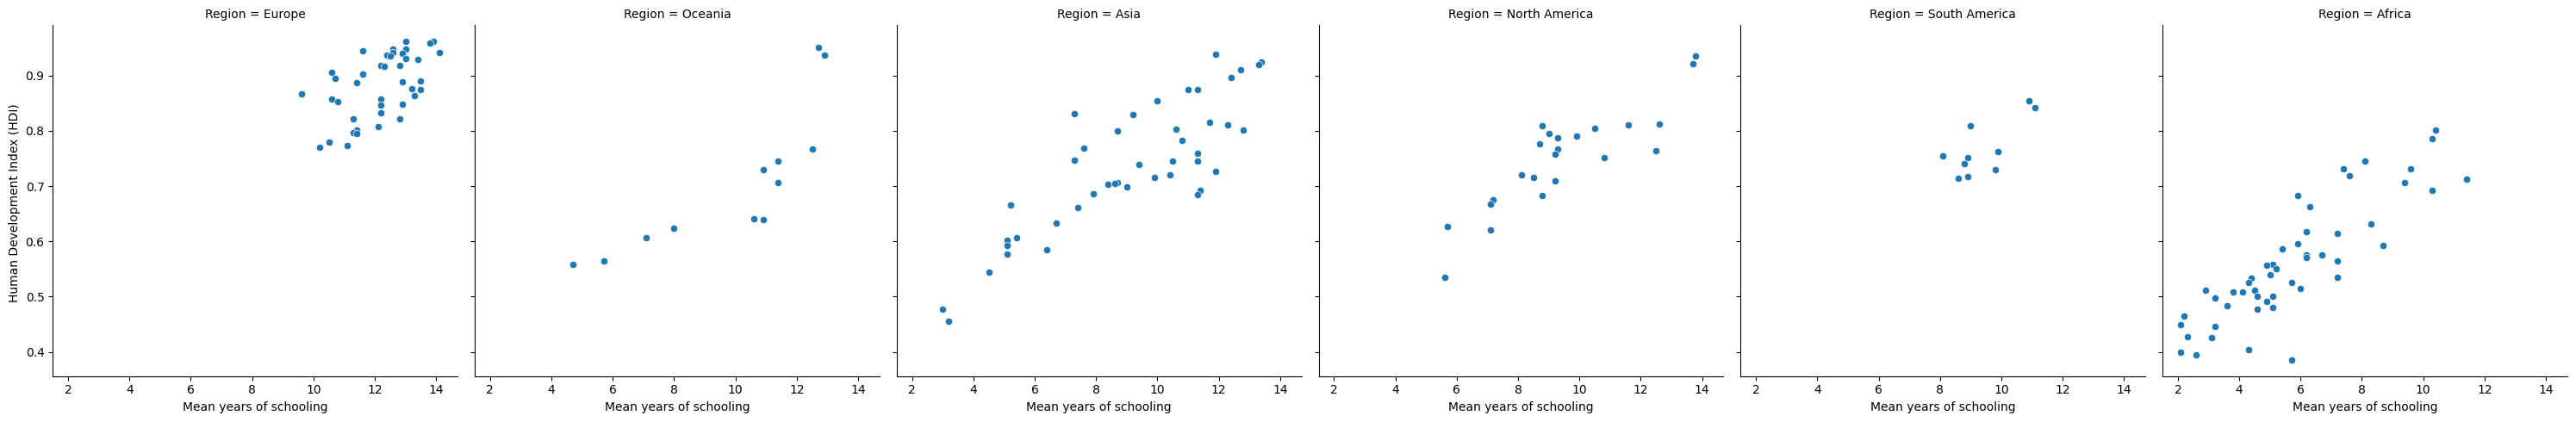

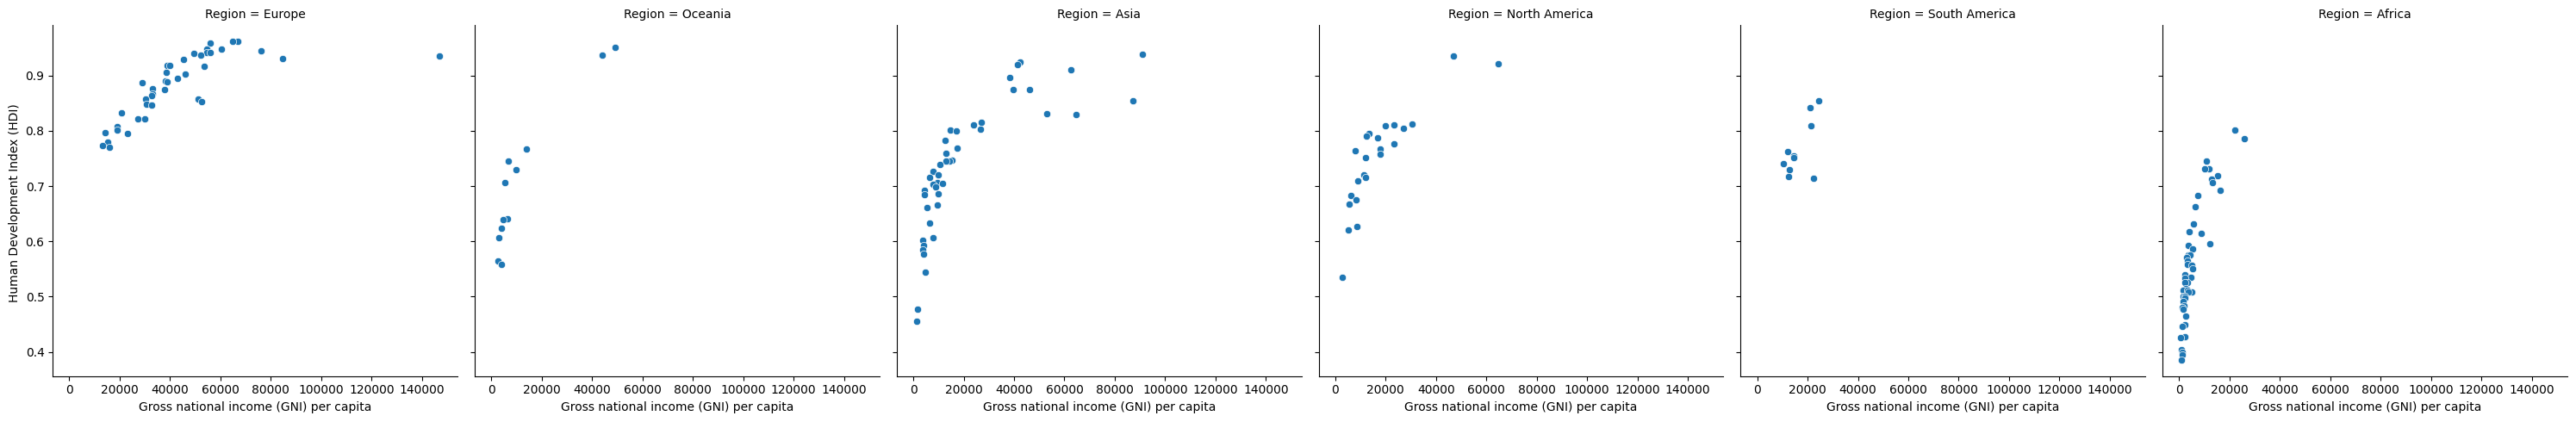

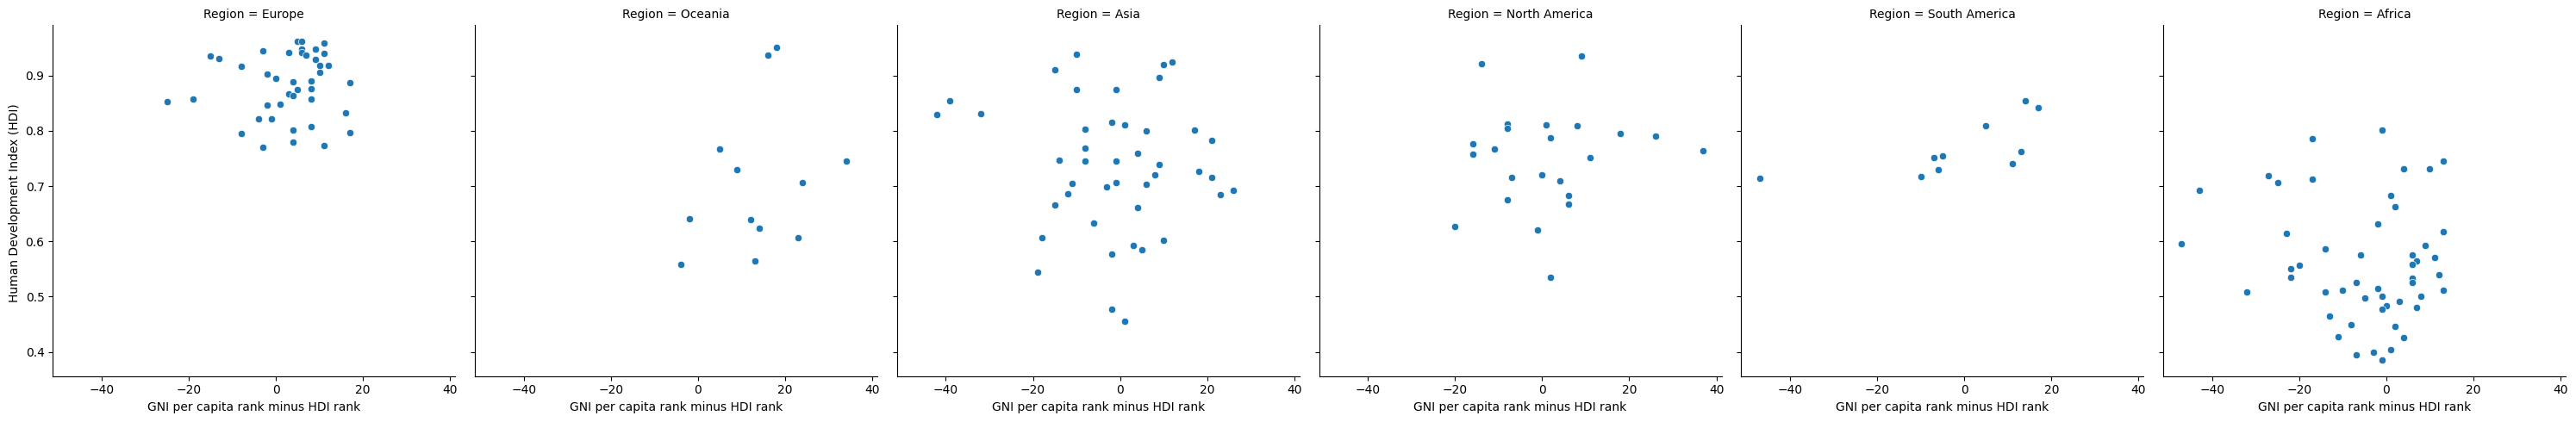

In [81]:
columns  = ['Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita']

for col in cols:
    sns.relplot(data=data, x=col, y='Human Development Index (HDI) ',kind='scatter', col='Region')
    plt.show()

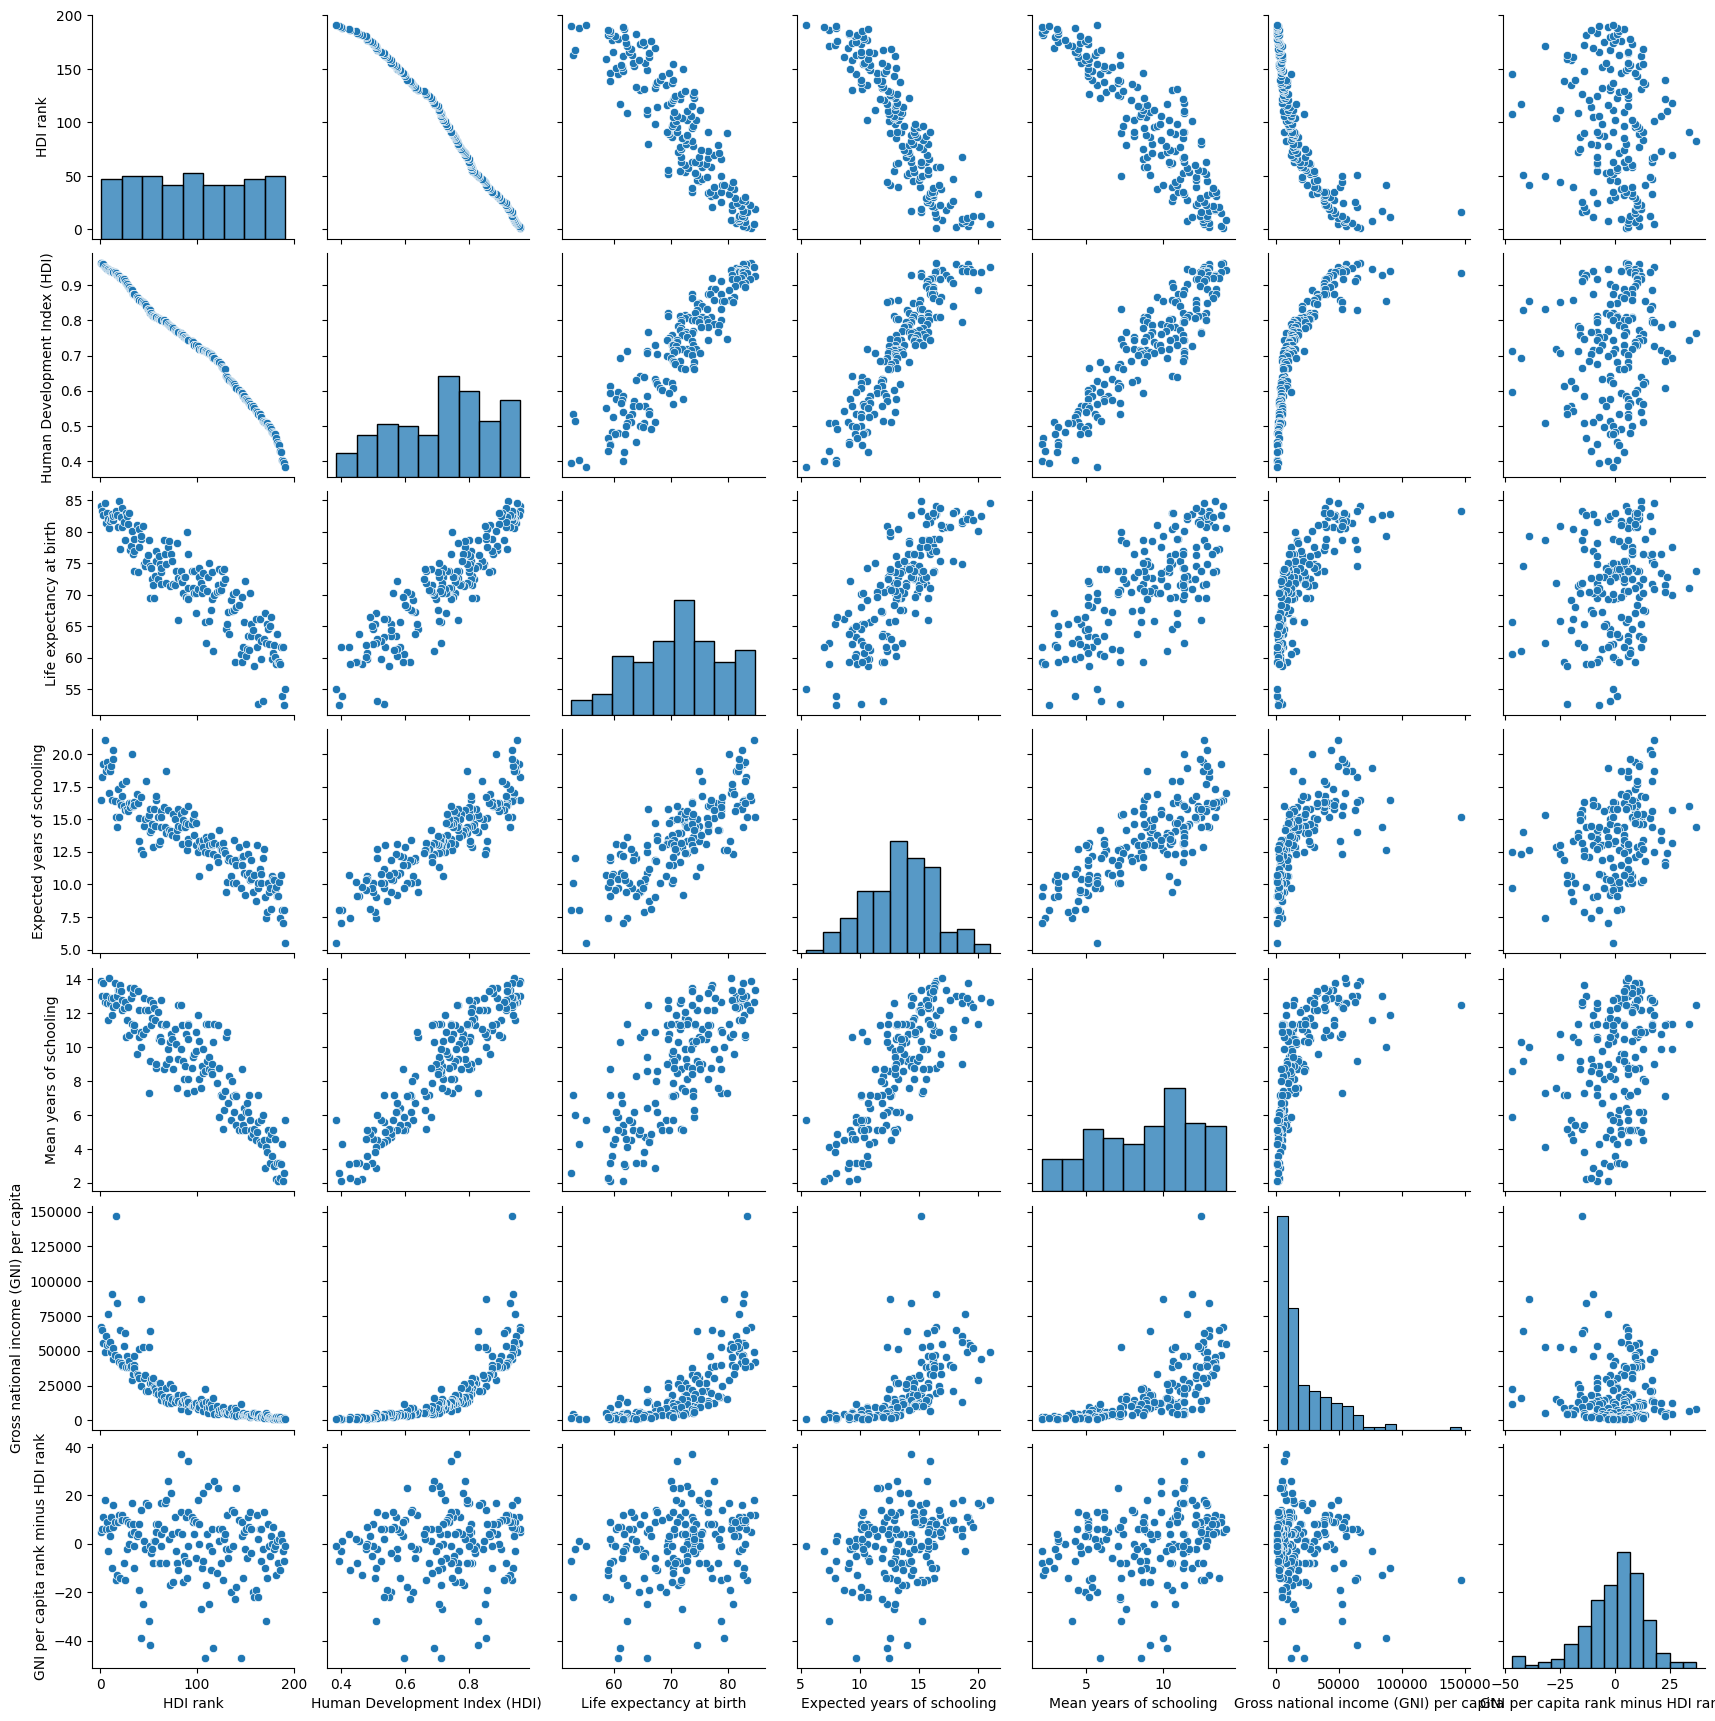

In [82]:
sns.pairplot(data=data)

In [85]:
import statsmodels.api as sm

X  = data[['Expected years of schooling','Life expectancy at birth','Mean years of schooling']].values
y = data['Human Development Index (HDI) '].values


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2064.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          2.71e-136
Time:                        20:17:38   Log-Likelihood:                 406.30
No. Observations:                 179   AIC:                            -804.6
Df Residuals:                     175   BIC:                            -791.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1949      0.022     -9.002      0.000      -0.238      -0.152
x1             0.0126      0.001     10.397      0.000       0.010       0.015
x2             0.0079      0.000     18.487      0.000       0.007       0.009
x3             0.0202      0.001     20.079      0.000       0.018       0.022
==============================================================================
Omnibus:                        2.081   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.893
Skew:                          -0.032   Prob(JB):                        0.388
Kurtosis:                       3.500   Cond. No.                         844.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""